In [1]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# hacks
import os
import sys
nb_dir = os.path.split(os.path.abspath(os.getcwd()))[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

### Test Files:

In [4]:
# test files
import SolarMagneticModel
import Transform

### Shorthand:

In [5]:
# useful shorthand for spot-checking field values 
#--------------------------------------------------

def magnitude(vector):
    """ return vector magnitude, |v| = sqrt( v . v )
    """
    vector = np.array(vector)
    return np.sqrt( np.dot(vector, vector) )

def fieldStrength(cartesian_pos):
    """ return dictionary of field strength magnitudes
    """
    B_dipole  = magnitude( SolarMagneticModel.solarDipole(cartesian_pos) )
    B_sunspot = magnitude( SolarMagneticModel.solarSunspot(cartesian_pos) )
    B_dynamo  = magnitude( SolarMagneticModel.solarDynamo(cartesian_pos) )
    B_ring    = magnitude( SolarMagneticModel.solarRingEMR(cartesian_pos) )
    B_total   = magnitude( SolarMagneticModel.sumBfieldGauss(cartesian_pos) )
    return {'dipole':B_dipole, 'sunspot':B_sunspot, 'dynamo':B_dynamo, 'ring':B_ring, 'total':B_total}

def printFieldStrength(cartesian_pos):
    """ prints field strength magnitudes
    """
    field_dict = fieldStrength(cartesian_pos)
    print 'dipole:  {:8.3} [microGauss]'.format(field_dict['dipole']*1e6)
    print 'sunspot: {:8.3} [microGauss]'.format(field_dict['sunspot']*1e6)
    print 'dynamo:  {:8.3} [microGauss]'.format(field_dict['dynamo']*1e6)
    print 'ring:    {:8.3} [microGauss]'.format(field_dict['ring']*1e6)
    print '----------------------------'
    print 'total:   {:8.3} [microGauss]'.format(field_dict['total']*1e6)

def printComponents(vector):
    print '( {:8.3}, {:8.3}, {:8.3} )'.format(vector[0], vector[1], vector[2])

## Probe field at a point:

In [6]:
# probe field
#----------------
x = 1    # [AU]
y = 0    # [AU]
z = 0.01 # [AU]
cartesian_pos = np.array([ x, y, z ])
printFieldStrength(cartesian_pos) 

dipole:     0.101 [microGauss]
sunspot:     9.05 [microGauss]
dynamo:      35.0 [microGauss]
ring:        35.0 [microGauss]
----------------------------
total:       50.5 [microGauss]


# Dipole Component:

z = 0.01 [AU]
B_rho (-),  B_theta (+),  B_z (+)


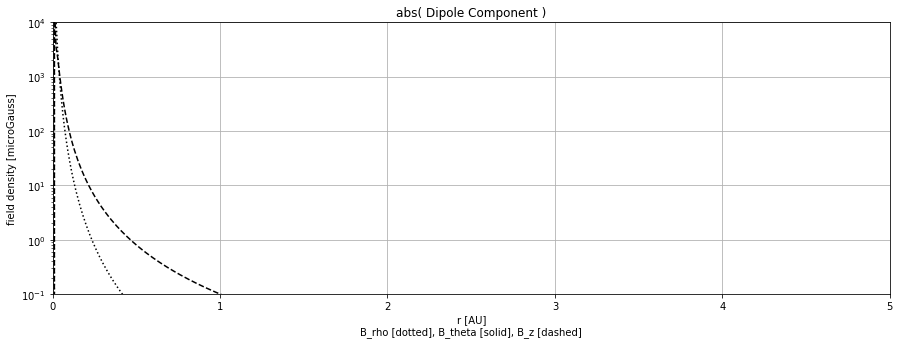

In [20]:
def plotDipole(z=0.01):
    """Plot dipole component of solar magnetic field model
    """
    print 'z = {} [AU]'.format(z)
    r_list = np.linspace(0, 5, 500) # [AU]
    B_rho   = []
    B_theta = []
    B_z     = []
    for r in r_list:
        cartesian_pos = np.array([ r, 0, z ] ) # [AU]
        cartesian_B = SolarMagneticModel.solarDipole(cartesian_pos) # [Gauss]
        polar_B = Transform.cartesian2polar( cartesian_pos, cartesian_B )['vec']
        B_rho.append(polar_B[0])
        B_theta.append(polar_B[1])
        B_z.append(polar_B[2])
    
    if B_rho[-1] >= 0:
        print 'B_rho (+), ',
    else:
        print 'B_rho (-), ',

    if B_theta[-1] >= 0:
        print 'B_theta (+), ',
    else:
        print 'B_theta (-), ',

    if B_z[-1] >= 0:
        print 'B_z (+)'
    else:
        print 'B_z (-)'
    
    B_rho   = np.abs( B_rho   ) * 1e6 # [uGauss]
    B_theta = np.abs( B_theta ) * 1e6 # [uGauss]
    B_z     = np.abs( B_z     ) * 1e6 # [uGauss]
    
    plt.figure(figsize=(15,5))
    plt.yscale('log')
    plt.xlim(0,5)
    plt.ylim(.1,1e4)
    plt.grid(True)
    plt.xlabel('r [AU]\n' + 'B_rho [dotted], B_theta [solid], B_z [dashed]')
    plt.ylabel('field density [microGauss]')
    plt.title('abs( Dipole Component )')
    
    plt.plot( r_list, B_rho, color='black', linestyle='dotted' )
    plt.plot( r_list, B_theta, color='black', linestyle='solid' )
    plt.plot( r_list, B_z, color='black', linestyle='dashed' )

plotDipole()

# Sunspot Component:

z = 0.01 [AU]
B_rho (-),  B_theta (-),  B_z (+)


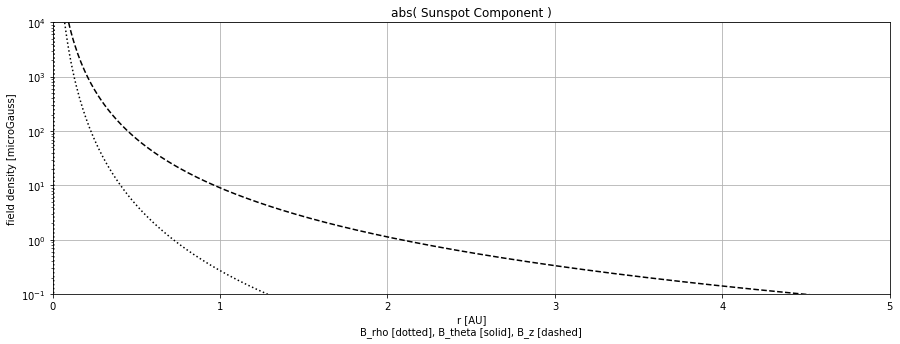

In [18]:
def plotSunspot(z=0.01):
    """Plot sunspot component of solar magnetic field model
    """
    print 'z = {} [AU]'.format(z)
    r_list = np.linspace(0, 5, 500) # [AU]
    B_rho   = []
    B_theta = []
    B_z     = []
    for r in r_list:
        cartesian_pos = np.array([ r, 0, z ] ) # [AU]
        cartesian_B = SolarMagneticModel.solarSunspot(cartesian_pos) # [Gauss]
        polar_B = Transform.cartesian2polar( cartesian_pos, cartesian_B )['vec']
        B_rho.append(polar_B[0])
        B_theta.append(polar_B[1])
        B_z.append(polar_B[2])

    if B_rho[-1] >= 0:
        print 'B_rho (+), ',
    else:
        print 'B_rho (-), ',

    if B_theta[-1] >= 0:
        print 'B_theta (+), ',
    else:
        print 'B_theta (-), ',

    if B_z[-1] >= 0:
        print 'B_z (+)'
    else:
        print 'B_z (-)'
    
    B_rho   = np.abs( B_rho   ) * 1e6 # [uGauss]
    B_theta = np.abs( B_theta ) * 1e6 # [uGauss]
    B_z     = np.abs( B_z     ) * 1e6 # [uGauss]
    
    plt.figure(figsize=(15,5))
    plt.yscale('log')
    plt.xlim(0,5)
    plt.ylim(.1,1e4)
    plt.grid(True)
    plt.xlabel('r [AU]\n' + 'B_rho [dotted], B_theta [solid], B_z [dashed]')
    plt.ylabel('field density [microGauss]')
    plt.title('abs( Sunspot Component )')
    
    plt.plot( r_list, B_rho, color='black', linestyle='dotted' )
    plt.plot( r_list, B_theta, color='black', linestyle='solid' )
    plt.plot( r_list, B_z, color='black', linestyle='dashed' )

plotSunspot()

# Dynamo Component:

z = 0.01 [AU]
B_rho (+),  B_theta (+),  B_z (+)


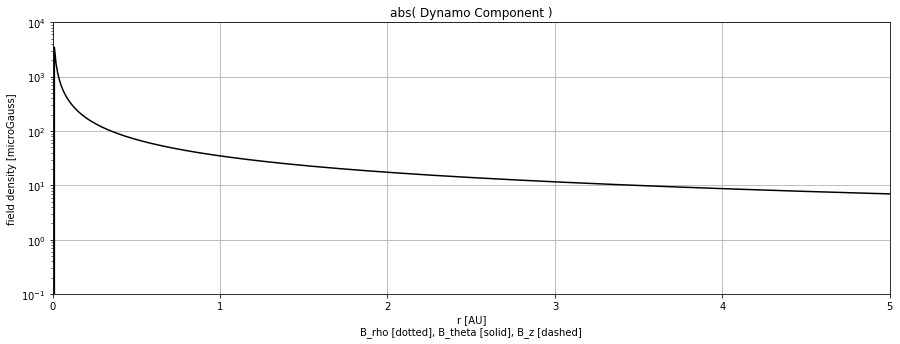

In [17]:
def plotDynamo(z=0.01):
    """Plot dynamo component of solar magnetic field model
    """
    print 'z = {} [AU]'.format(z)
    r_list = np.linspace(0, 5, 500) # [AU]
    B_rho   = []
    B_theta = []
    B_z     = []
    for r in r_list:
        cartesian_pos = np.array([ r, 0, z ] ) # [AU]
        cartesian_B = SolarMagneticModel.solarDynamo(cartesian_pos) # [Gauss]
        polar_B = Transform.cartesian2polar( cartesian_pos, cartesian_B )['vec']
        B_rho.append(polar_B[0])
        B_theta.append(polar_B[1])
        B_z.append(polar_B[2])

    if B_rho[-1] >= 0:
        print 'B_rho (+), ',
    else:
        print 'B_rho (-), ',

    if B_theta[-1] >= 0:
        print 'B_theta (+), ',
    else:
        print 'B_theta (-), ',

    if B_z[-1] >= 0:
        print 'B_z (+)'
    else:
        print 'B_z (-)'

    B_rho   = np.abs( B_rho   ) * 1e6 # [uGauss]
    B_theta = np.abs( B_theta ) * 1e6 # [uGauss]
    B_z     = np.abs( B_z     ) * 1e6 # [uGauss]

    plt.figure(figsize=(15,5))
    plt.yscale('log')
    plt.xlim(0,5)
    plt.ylim(.1,1e4)
    plt.grid(True)
    plt.xlabel('r [AU]\n' + 'B_rho [dotted], B_theta [solid], B_z [dashed]')
    plt.ylabel('field density [microGauss]')
    plt.title('abs( Dynamo Component )')

    plt.plot( r_list, B_rho, color='black', linestyle='dotted' )
    plt.plot( r_list, B_theta, color='black', linestyle='solid' )
    plt.plot( r_list, B_z, color='black', linestyle='dashed' )

plotDynamo()

# EMR-Ring Component:

z = 0.01 [AU]
B_rho (-),  B_theta (+),  B_z (-)


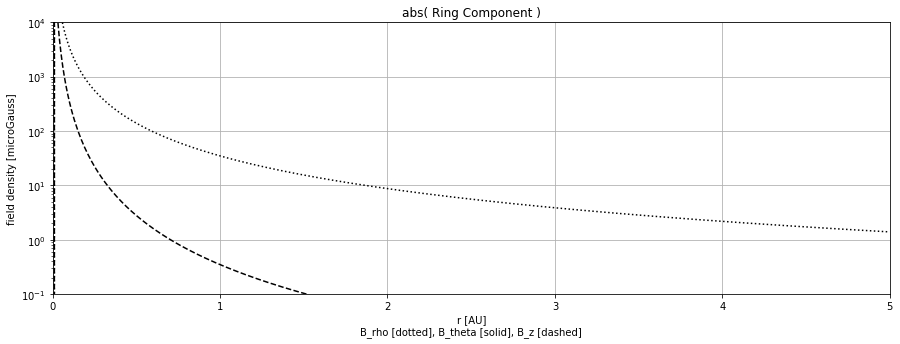

In [15]:
def plotRing(z=0.01):
    """Plot ring component of solar magnetic field model
    (1999 Epele-Mollerach-Roulet approximation)
    """
    print 'z = {} [AU]'.format(z)
    r_list = np.linspace(0, 5, 500) # [AU]
    B_rho   = []
    B_theta = []
    B_z     = []
    for r in r_list:
        cartesian_pos = np.array([ r, 0, z ] ) # [AU]
        cartesian_B = SolarMagneticModel.solarRingEMR(cartesian_pos) # [Gauss]
        polar_B = Transform.cartesian2polar( cartesian_pos, cartesian_B )['vec']
        B_rho.append(polar_B[0])
        B_theta.append(polar_B[1])
        B_z.append(polar_B[2])

    if B_rho[-1] >= 0:
        print 'B_rho (+), ',
    else:
        print 'B_rho (-), ',

    if B_theta[-1] >= 0:
        print 'B_theta (+), ',
    else:
        print 'B_theta (-), ',

    if B_z[-1] >= 0:
        print 'B_z (+)'
    else:
        print 'B_z (-)'

    B_rho   = np.abs( B_rho   ) * 1e6 # [uGauss]
    B_theta = np.abs( B_theta ) * 1e6 # [uGauss]
    B_z     = np.abs( B_z     ) * 1e6 # [uGauss]
    
    plt.figure(figsize=(15,5))
    plt.yscale('log')
    plt.xlim(0,5)
    plt.ylim(.1,1e4)
    plt.grid(True)
    plt.xlabel('r [AU]\n' + 'B_rho [dotted], B_theta [solid], B_z [dashed]')
    plt.ylabel('field density [microGauss]')
    plt.title('abs( Ring Component )')
    
    plt.plot( r_list, B_rho, color='black', linestyle='dotted' )
    plt.plot( r_list, B_theta, color='black', linestyle='solid' )
    plt.plot( r_list, B_z, color='black', linestyle='dashed' )

plotRing()

# Total Solar Field (EMR):

z = 0.1 [AU]
B_rho (-),  B_theta (+),  B_z (+)


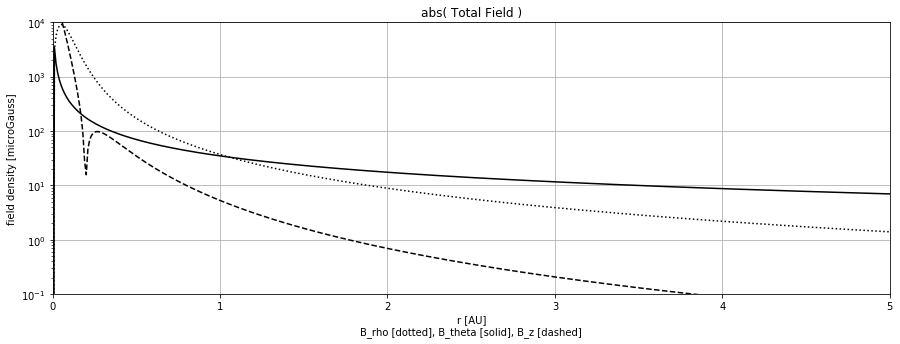

In [16]:
def plotPolar(z=.1):
    """Plot total solar magnetic field model by polar coordinates.
    Uses EMR approximation for the ring component.
    """
    print 'z = {} [AU]'.format(z)
    r_list = np.linspace(0, 5, 500) # [AU]
    B_rho   = []
    B_theta = []
    B_z     = []
    for r in r_list:
        cartesian_pos = np.array([ r, 0, z ] ) # [AU]
        cartesian_B = SolarMagneticModel.sumBfieldGauss(cartesian_pos) # [Gauss]
        polar_B = Transform.cartesian2polar( cartesian_pos, cartesian_B )['vec']
        B_rho.append(polar_B[0])
        B_theta.append(polar_B[1])
        B_z.append(polar_B[2])

    if B_rho[-1] >= 0:
        print 'B_rho (+), ',
    else:
        print 'B_rho (-), ',

    if B_theta[-1] >= 0:
        print 'B_theta (+), ',
    else:
        print 'B_theta (-), ',

    if B_z[-1] >= 0:
        print 'B_z (+)'
    else:
        print 'B_z (-)'
    
    B_rho   = np.abs( B_rho   ) * 1e6 # [uGauss]
    B_theta = np.abs( B_theta ) * 1e6 # [uGauss]
    B_z     = np.abs( B_z     ) * 1e6 # [uGauss]

    plt.figure(figsize=(15,5))
    plt.yscale('log')
    plt.xlim(0,5)
    plt.ylim(.1,1e4)
    plt.grid(True)
    plt.xlabel('r [AU]\n' + 'B_rho [dotted], B_theta [solid], B_z [dashed]')
    plt.ylabel('field density [microGauss]')
    plt.title('abs( Total Field )')

    plt.plot( r_list, B_rho, color='black', linestyle='dotted' )
    plt.plot( r_list, B_theta, color='black', linestyle='solid' )
    plt.plot( r_list, B_z, color='black', linestyle='dashed' )

plotPolar()